<a href="https://colab.research.google.com/github/Gnanasree12/iiit_internship/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics
from ultralytics import YOLO

# Clone your repo here if you already have one (optional)
# !git clone https://github.com/YourUsername/YourRepoName.git


In [2]:
from google.colab import files
uploaded = files.upload()


Saving cookies (1).txt to cookies (1).txt


In [3]:
import os
os.rename("cookies (1).txt", "cookies.txt")


In [4]:
!yt-dlp --cookies cookies.txt https://youtu.be/46iWkLmZ4g8 -o accident_video.mp4


[youtube] Extracting URL: https://youtu.be/46iWkLmZ4g8
[youtube] 46iWkLmZ4g8: Downloading webpage
[youtube] 46iWkLmZ4g8: Downloading tv client config
[youtube] 46iWkLmZ4g8: Downloading tv player API JSON
[youtube] 46iWkLmZ4g8: This video is age-restricted; some formats may be missing without authentication. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
[youtube] 46iWkLmZ4g8: Downloading web embedded client config
[youtube] 46iWkLmZ4g8: Downloading web embedded player API JSON
[youtube] 46iWkLmZ4g8: Downloading ios player API JSON
ERROR: [youtube] 46iWkLmZ4g8: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/y

In [5]:
!mkdir -p accident_frames
!ffmpeg -i accident_video.mp4.webm -vf fps=1 accident_frames/frame_%04d.jpg


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Total Frames Extracted: 21


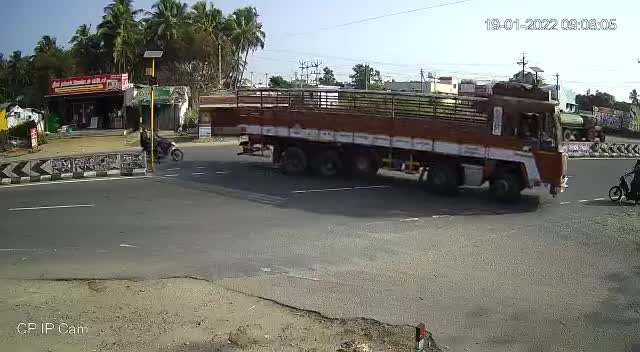

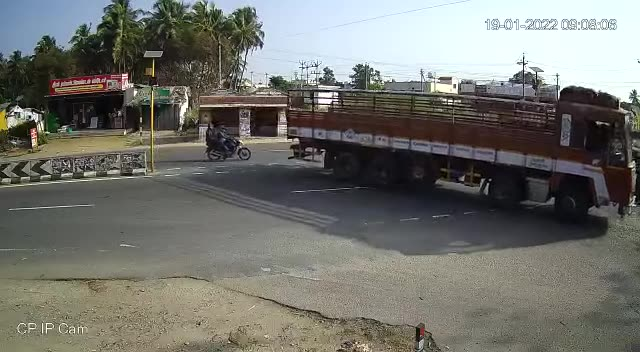

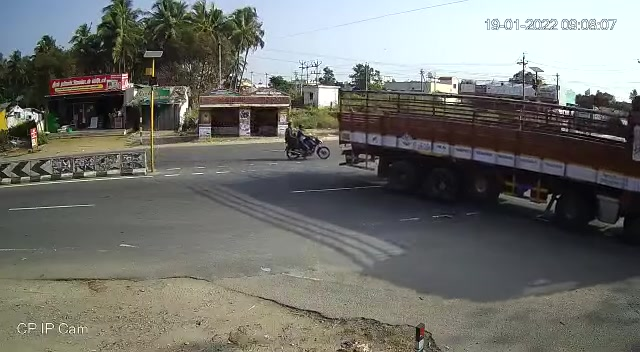

In [6]:
import os
from IPython.display import Image, display

# List the files
frames = os.listdir("accident_frames")
print("Total Frames Extracted:", len(frames))

# Display first few frames
for frame in sorted(frames)[:3]:
    display(Image(filename=f"accident_frames/{frame}"))


In [7]:
!pip install ultralytics roboflow


In [11]:
from roboflow import Roboflow

rf = Roboflow(api_key="cnqGOA9rCiIPsmAHil0d")

# Use the correct workspace and project IDs
project = rf.workspace("training-set-tzppf").project("silent-accident-detection-using-sdv1i")

# Download dataset version 1 for YOLOv8
dataset = project.version(1).download("yolov8")




loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to Silent-Accident-Detection-using--1 in yolov8:: 100%|██████████| 53/53 [00:00<00:00, 5946.82it/s]


In [12]:
from ultralytics import YOLO

# Load a YOLOv8 model (you can use yolov8n/yolov8s/yolov8m/yolov8l)
model = YOLO("yolov8n.pt")

# Train the model on your dataset
results = model.train(data="Silent-Accident-Detection-using--1/data.yaml", epochs=50, imgsz=640)


100%|██████████| 6.25M/6.25M [00:00<00:00, 79.9MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Silent-Accident-Detection-using--1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    752287  ultralytics.nn.modules.head.Detect           [5, [64, 128, 256]]           
Model summary: 129 layers, 3,011,823 parameters, 3,011,807 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 413.9±0.0 MB/s, size: 37.0 KB)


train: Scanning /content/Silent-Accident-Detection-using--1/train/labels... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<00:00, 22.33it/s]

train: New cache created: /content/Silent-Accident-Detection-using--1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1055.6±342.9 MB/s, size: 39.0 KB)


val: Scanning /content/Silent-Accident-Detection-using--1/valid/labels... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<00:00, 2981.29it/s]

val: New cache created: /content/Silent-Accident-Detection-using--1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G       3.36      4.031      3.119          5        640: 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]

                   all          8         32     0.0124      0.746      0.088     0.0454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.779       3.88      2.122          5        640: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all          8         32     0.0157      0.796      0.112     0.0479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      3.003      3.737      2.298         12        640: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all          8         32     0.0165      0.796      0.118      0.051



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      3.727      3.926      3.168          6        640: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          8         32     0.0171      0.796      0.127      0.055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      2.221      3.678      2.063          6        640: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all          8         32     0.0179      0.796      0.139      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      2.335      3.769      2.191          5        640: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]

                   all          8         32     0.0192      0.827      0.115     0.0427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.788      3.429      1.864          7        640: 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all          8         32     0.0197      0.842      0.112      0.044



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      2.114      3.641      1.959         12        640: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all          8         32     0.0197      0.814      0.137     0.0454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      2.166      3.914      1.707         10        640: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all          8         32     0.0212      0.858      0.158     0.0478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      2.461      4.039      1.833         16        640: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all          8         32     0.0206      0.858      0.151     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.371      3.464      1.436          8        640: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all          8         32     0.0207      0.858      0.168     0.0479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.873      3.467      1.558         10        640: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all          8         32       0.02      0.858      0.169     0.0482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.807      3.543      1.595         10        640: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          8         32     0.0197      0.858      0.167     0.0585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      2.449      3.866      1.806         14        640: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          8         32     0.0177      0.842      0.161     0.0684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      2.201       3.83      1.711         14        640: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all          8         32     0.0176      0.842      0.165     0.0807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.656      3.366      1.584          5        640: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          8         32     0.0176      0.842       0.16     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.802      3.192      1.815          9        640: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          8         32     0.0165      0.814      0.161     0.0877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      2.051      3.652      1.667         14        640: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all          8         32     0.0165      0.814      0.161     0.0877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      2.117      3.563      1.595         14        640: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all          8         32      0.016      0.814      0.155     0.0851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.811       3.56      1.559         14        640: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all          8         32      0.016      0.814      0.155     0.0851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.279      3.121      1.366         12        640: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all          8         32     0.0143      0.785      0.175      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      2.039      3.634      1.397         16        640: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all          8         32     0.0143      0.785      0.175      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.405      3.227      1.535          7        640: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          8         32     0.0115      0.728      0.175      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.713      3.022      1.305         14        640: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          8         32     0.0115      0.728      0.175      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.492      2.967      1.463          7        640: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all          8         32    0.00973      0.715      0.211      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G       1.81      2.843      1.715          8        640: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all          8         32    0.00973      0.715      0.211      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.596      3.017       1.39         12        640: 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.22s/it]

                   all          8         32    0.00987      0.728      0.192       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.504      2.581      1.239          9        640: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]

                   all          8         32    0.00987      0.728      0.192       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.547      2.962      1.463          6        640: 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.71s/it]

                   all          8         32     0.0102      0.757      0.196      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.347      2.605      1.572          7        640: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all          8         32     0.0102      0.757      0.196      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G        1.2      2.301      1.293         12        640: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          8         32     0.0101      0.757      0.211      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.099      2.385      1.323          5        640: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          8         32     0.0101      0.757      0.211      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.183      2.904      1.414          5        640: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all          8         32    0.00935      0.728      0.213      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.847      2.465      1.408         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all          8         32    0.00935      0.728      0.213      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.332      2.195      1.258         11        640: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          8         32    0.00922      0.717       0.21      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.037       1.84      1.038         12        640: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          8         32    0.00922      0.717       0.21      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.148      2.448      1.525          6        640: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all          8         32    0.00926      0.717      0.202      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.021      1.577      1.166         12        640: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all          8         32    0.00926      0.717      0.202      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G       1.67      3.329      1.771          3        640: 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all          8         32    0.00906      0.703      0.205      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.011      1.783      1.199         10        640: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          8         32    0.00906      0.703      0.205      0.106


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.177      1.798      1.192          4        640: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          8         32     0.0106      0.772      0.203     0.0919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.7295      1.925      1.071          3        640: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          8         32     0.0106      0.772      0.203     0.0919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      2.477      2.871      2.046          4        640: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

                   all          8         32     0.0109      0.785      0.187     0.0842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.088      1.643      1.239          4        640: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all          8         32     0.0109      0.785      0.187     0.0842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.103      1.954        1.3          3        640: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

                   all          8         32      0.851       0.16       0.18     0.0842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.231      1.962      1.459          3        640: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          8         32      0.851       0.16       0.18     0.0842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.347          3      1.674          3        640: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all          8         32      0.903       0.08      0.186     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.289      1.992      1.428          4        640: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

                   all          8         32      0.903       0.08      0.186     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.8464      1.482      1.093          4        640: 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all          8         32      0.909       0.08       0.19     0.0786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.8519      1.544      1.172          4        640: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          8         32      0.909       0.08       0.19     0.0786



50 epochs completed in 0.037 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


                   all          8         32     0.0102      0.757      0.196      0.118
              accident          5          5     0.0129          1       0.67      0.455
                  bike          7         13    0.00843      0.462      0.187     0.0815
                   car          3          3    0.00397          1     0.0232    0.00617
                  shop          7          7     0.0138      0.571      0.011    0.00473
                 truck          4          4     0.0117       0.75     0.0883     0.0429
Speed: 2.8ms preprocess, 127.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


In [15]:
model.predict(source="accident_video.mp4.webm", save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/530) /content/accident_video.mp4.webm: 352x640 (no detections), 207.3ms
video 1/1 (frame 2/530) /content/accident_video.mp4.webm: 352x640 (no detections), 181.5ms
video 1/1 (frame 3/530) /content/accident_video.mp4.webm: 352x640 (no detections), 113.4ms
video 1/1 (frame 4/530) /content/accident_video.mp4.webm: 352x640 (no detections), 112.5ms
video 1/1 (frame 5/530) /content/accident_video.mp4.webm: 352x640 (no detections), 131.3ms
v

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'accident', 1: 'bike', 2: 'car', 3: 'shop', 4: 'truck'}
 obb: None
 orig_img: array([[[166, 131, 100],
         [166, 131, 100],
         [168, 133, 102],
         ...,
         [255, 255, 237],
         [255, 255, 237],
         [255, 255, 237]],
 
        [[166, 131, 100],
         [166, 131, 100],
         [168, 133, 102],
         ...,
         [255, 255, 237],
         [255, 255, 237],
         [255, 255, 237]],
 
        [[166, 131, 100],
         [168, 133, 102],
         [168, 133, 102],
         ...,
         [255, 255, 237],
         [255, 255, 237],
         [255, 255, 237]],
 
        ...,
 
        [[ 99, 129, 129],
         [ 99, 129, 129],
         [ 99, 129, 129],
         ...,
         [ 61,  64,  64],
         [ 61,  64,  64],
         [ 61,  64,  64]],
 
        [[ 99, 129, 129],
         [ 99, 129, 129],
         [ 9

In [20]:
from IPython.display import Video

Video("runs/detect/predict/accident_video.mp4.webm", embed=True)


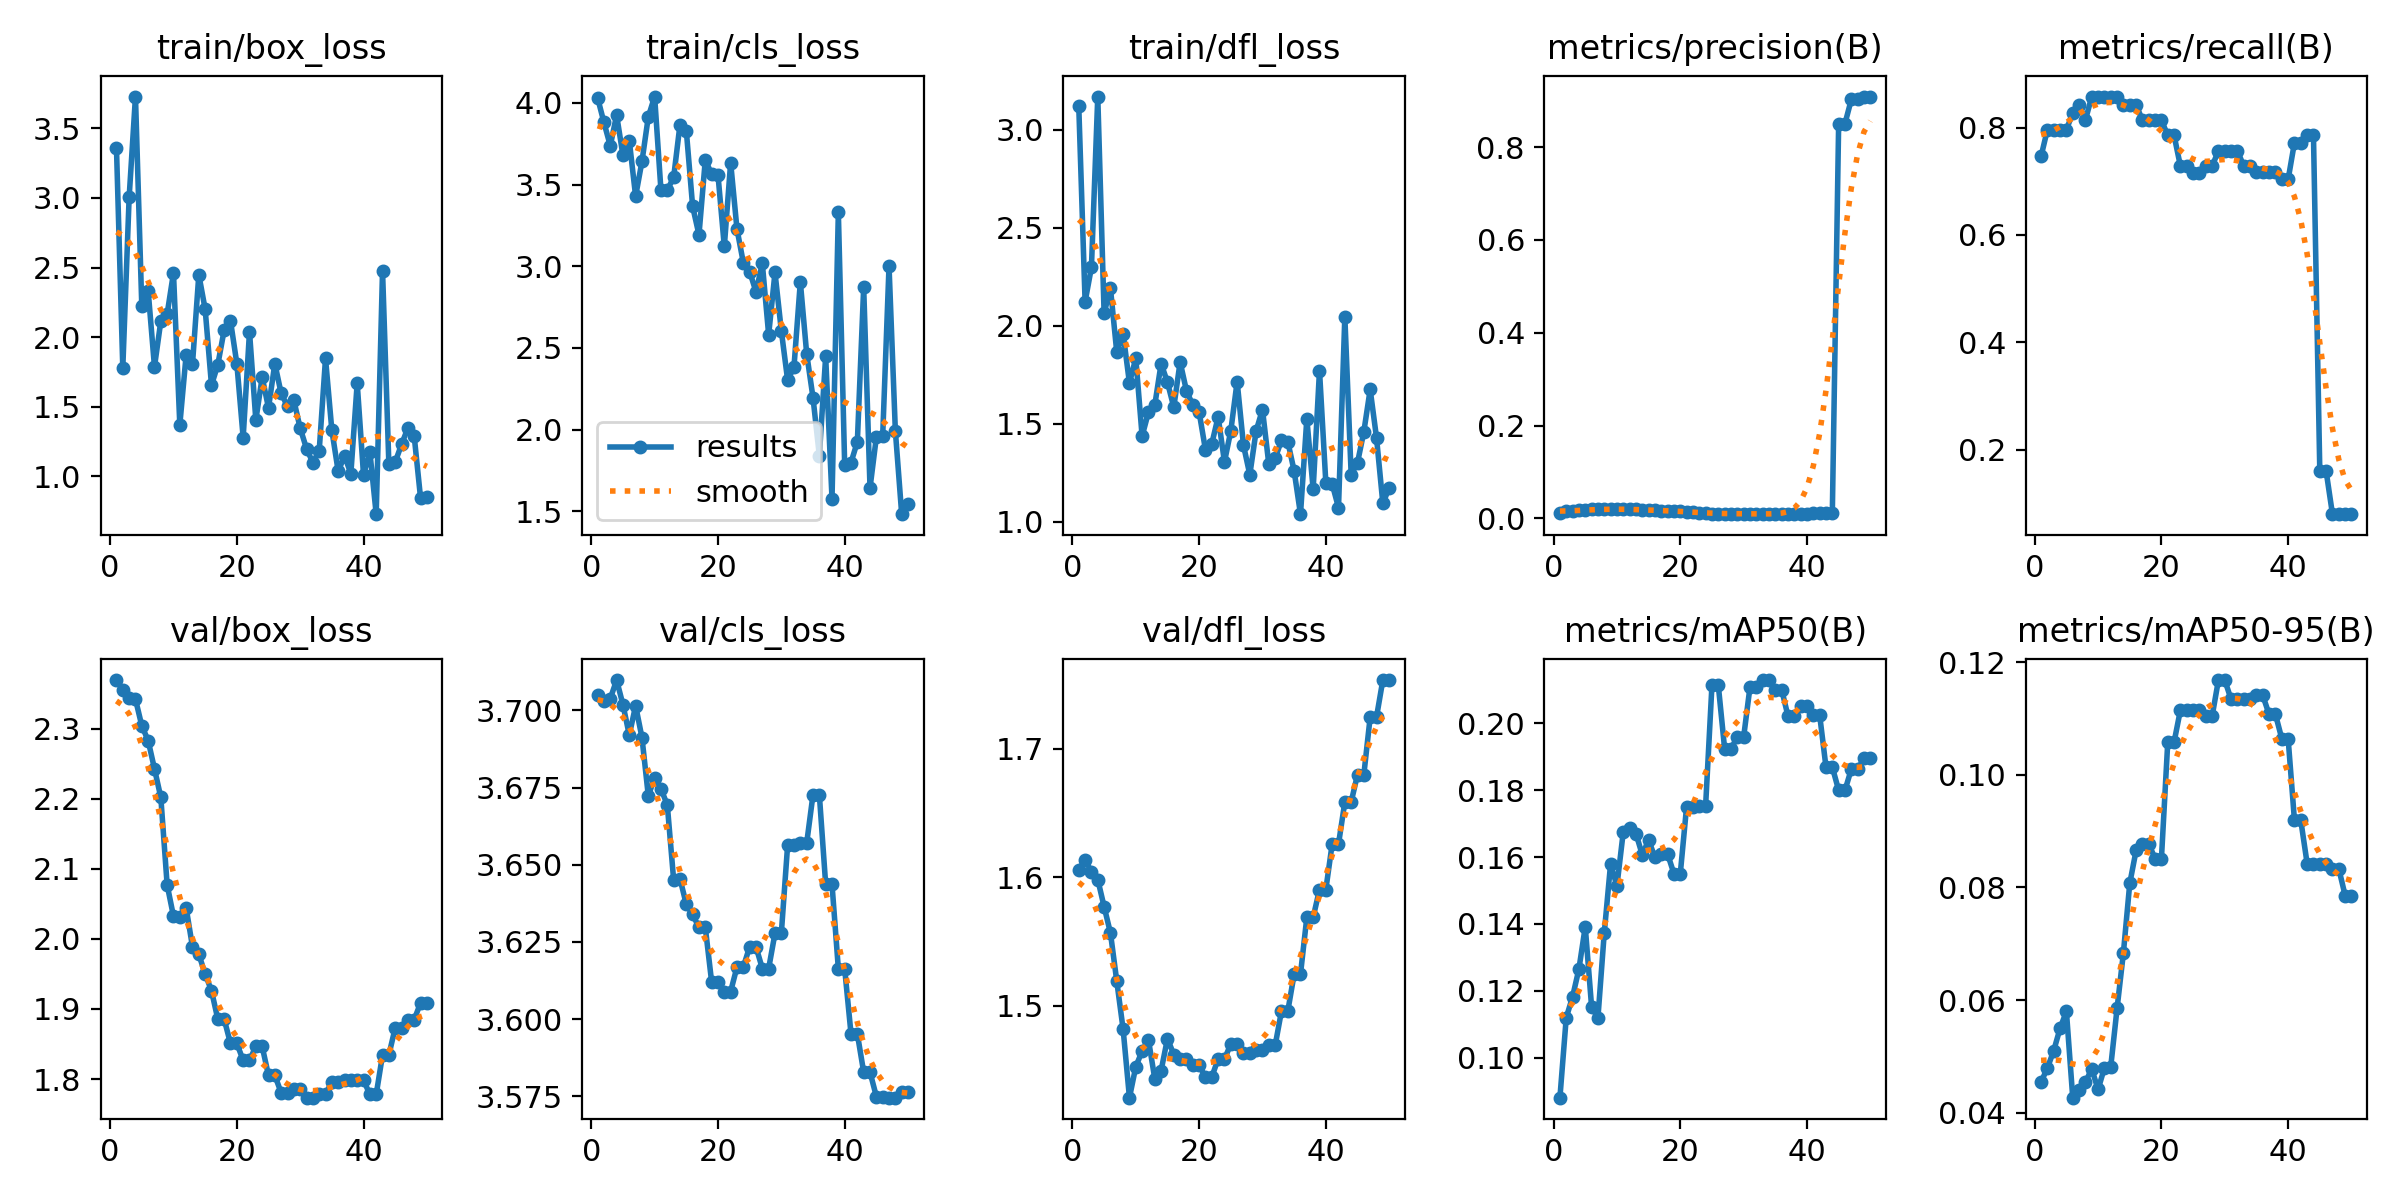

In [24]:
from IPython.display import Image, display

display(Image(filename='runs/detect/train/results.png'))  # Use the right 'train' folder name

In [32]:
# Run prediction on extracted frames
results_frames = model.predict(source="accident_frames", save=True)


image 1/21 /content/accident_frames/frame_0001.jpg: 352x640 (no detections), 197.7ms
image 2/21 /content/accident_frames/frame_0002.jpg: 352x640 (no detections), 166.8ms
image 3/21 /content/accident_frames/frame_0003.jpg: 352x640 (no detections), 165.7ms
image 4/21 /content/accident_frames/frame_0004.jpg: 352x640 (no detections), 174.8ms
image 5/21 /content/accident_frames/frame_0005.jpg: 352x640 (no detections), 178.4ms
image 6/21 /content/accident_frames/frame_0006.jpg: 352x640 (no detections), 179.0ms
image 7/21 /content/accident_frames/frame_0007.jpg: 352x640 (no detections), 191.8ms
image 8/21 /content/accident_frames/frame_0008.jpg: 352x640 (no detections), 155.0ms
image 9/21 /content/accident_frames/frame_0009.jpg: 352x640 (no detections), 109.5ms
image 10/21 /content/accident_frames/frame_0010.jpg: 352x640 (no detections), 115.1ms
image 11/21 /content/accident_frames/frame_0011.jpg: 352x640 (no detections), 112.2ms
image 12/21 /content/accident_frames/frame_0012.jpg: 352x640 (

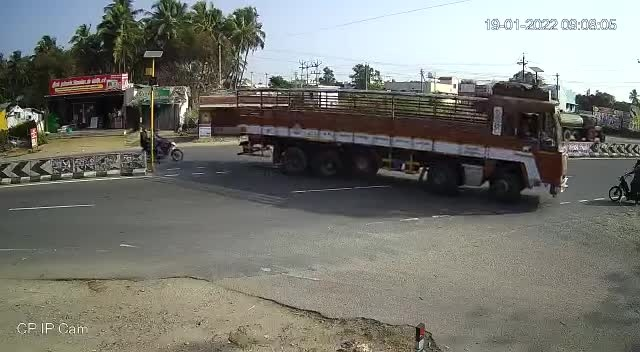

In [33]:
# Display a sample frame with predictions
from IPython.display import Image, display
import os

# Get the directory where results are saved (should be runs/detect/predict4 or similar)
results_dir = results_frames[0].save_dir

# List files in the results directory
predicted_frames = os.listdir(results_dir)

# Display the first predicted frame
if predicted_frames:
    display(Image(filename=os.path.join(results_dir, sorted(predicted_frames)[0])))
else:
    print("No predicted frames found.")

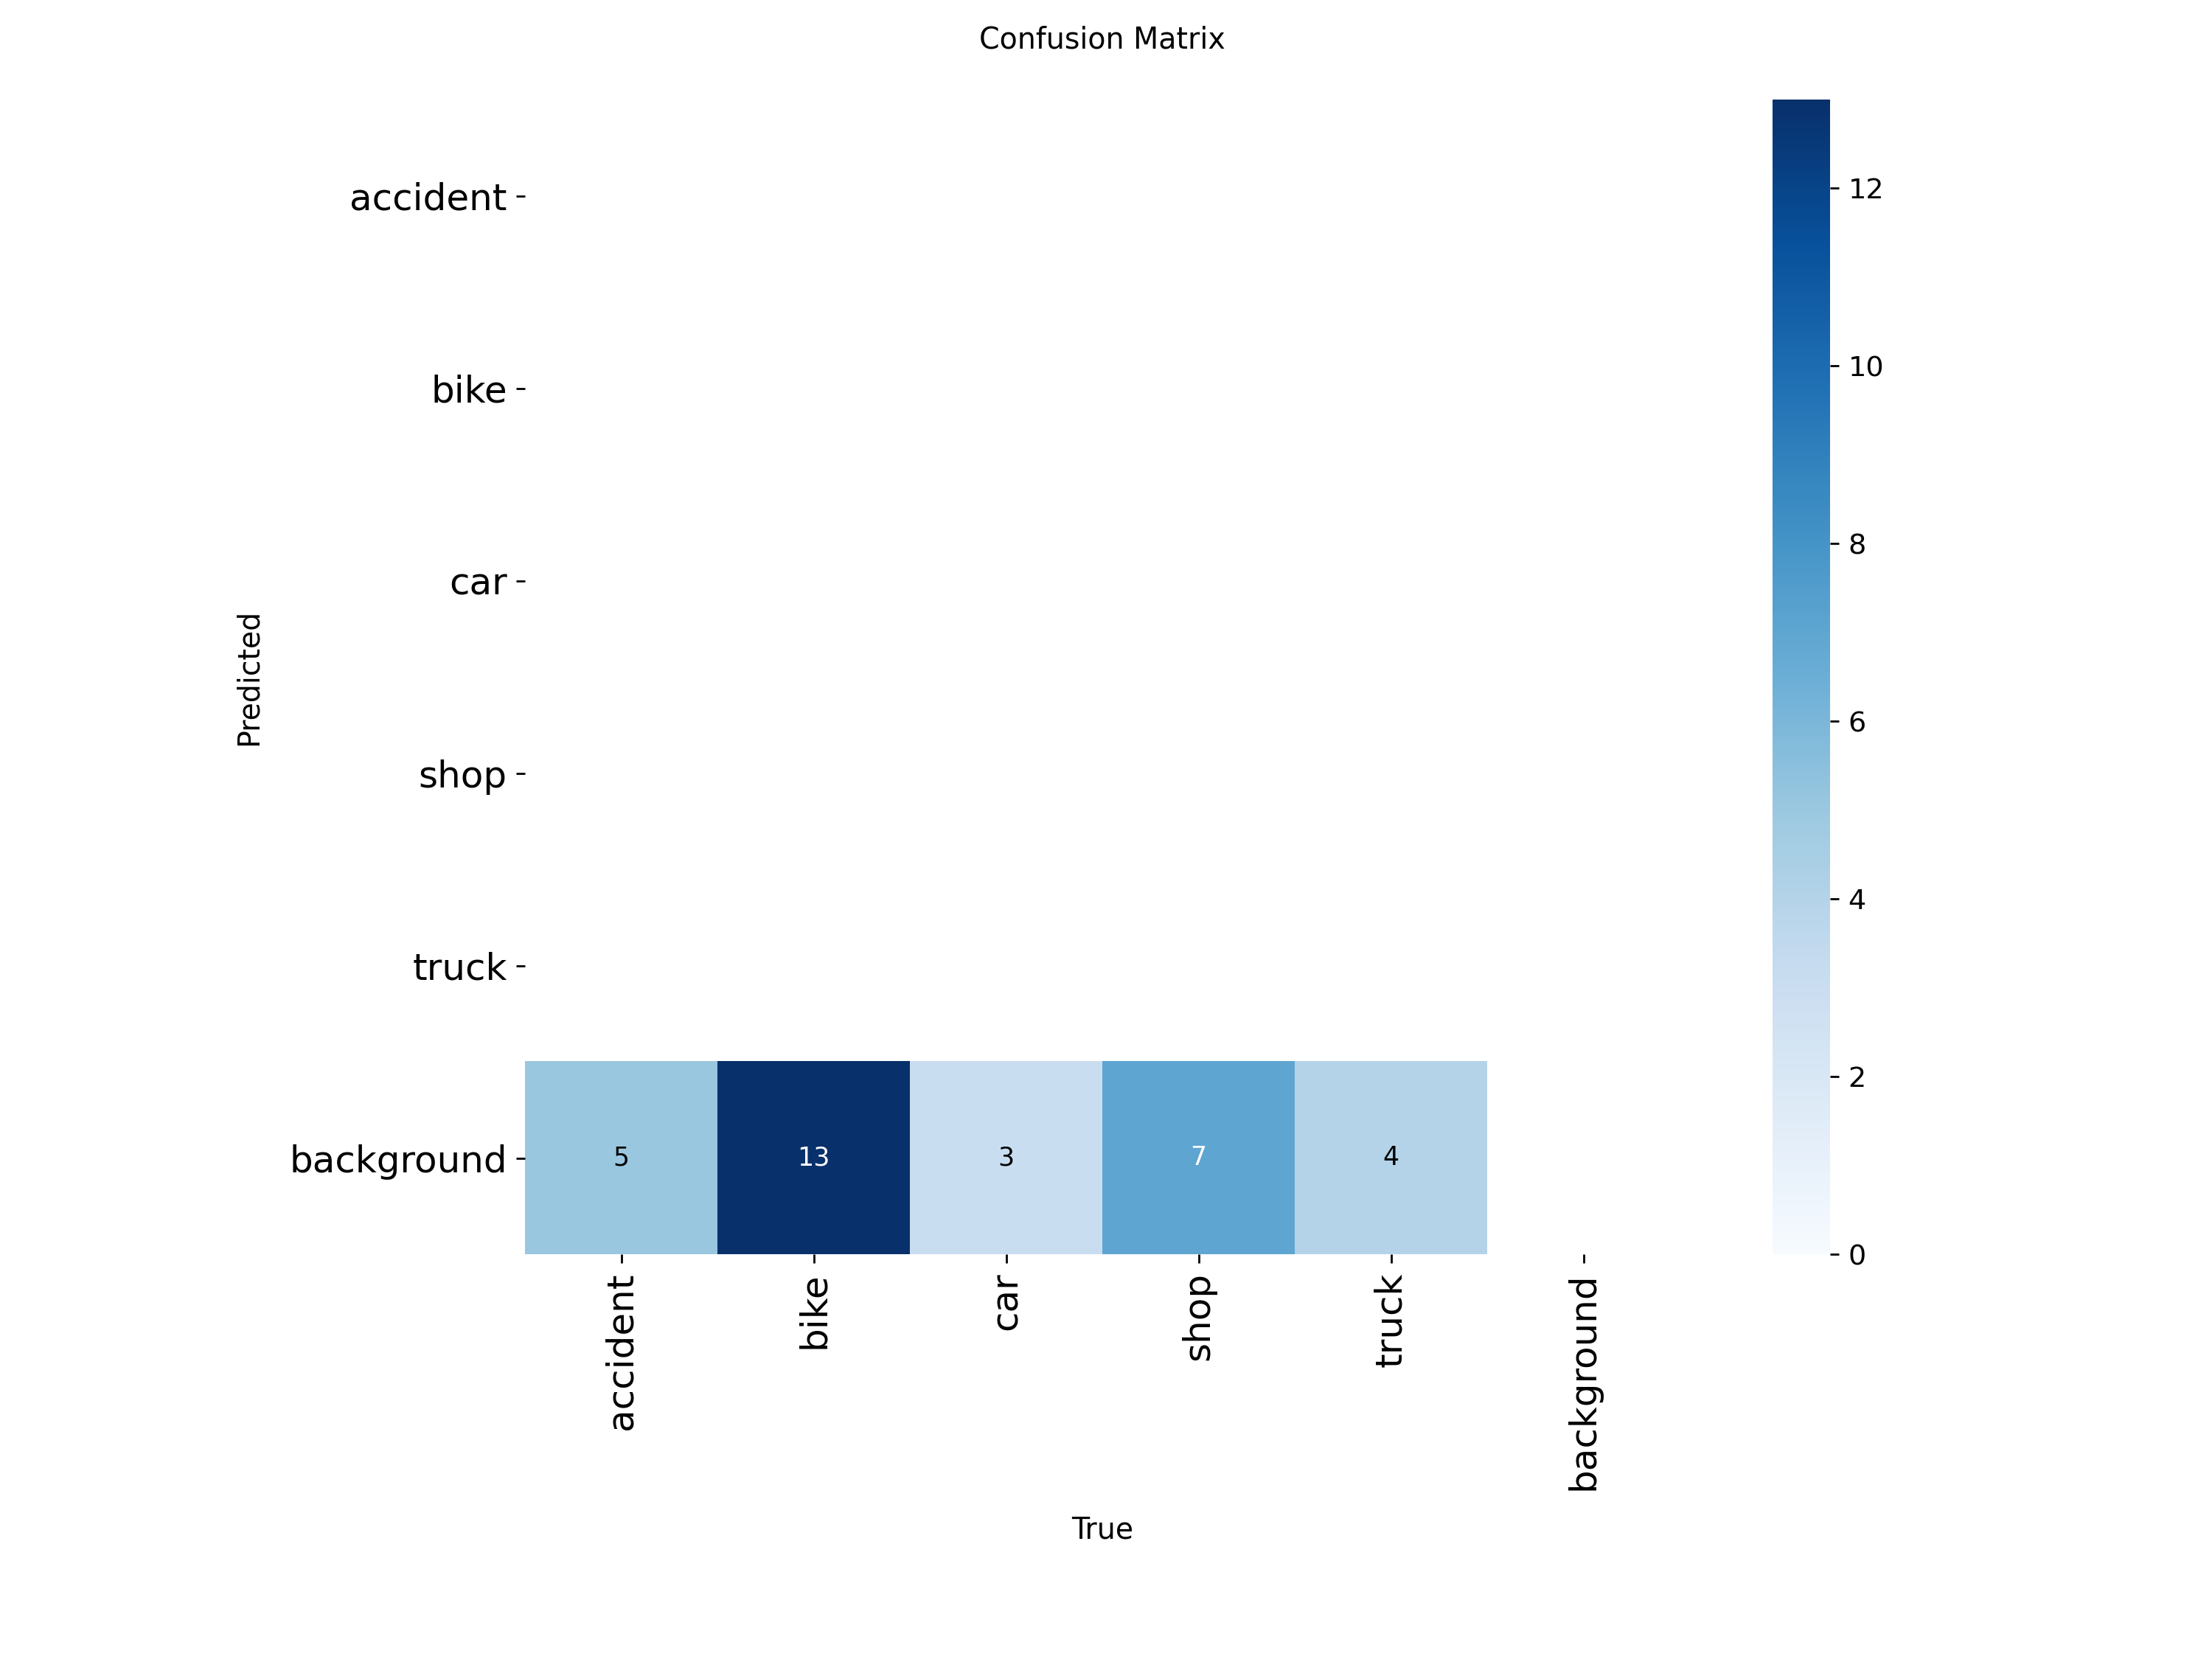

In [34]:
from IPython.display import Image, display
display(Image(filename='runs/detect/train2/confusion_matrix.png'))  # adjust folder if needed
